In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales_data.csv")

# Then preview the first 5 rows
print("First 5 rows:")
display(df.head())

# check basic info about the dataset
print("\nDataset Info:")
df.info()

# summarize key statistics
print("\nSummary Statistics:")
display(df.describe())

First 5 rows:


,OrderID,Date,Product,Category,Quantity,UnitPrice,TotalSales
0,1000,2023-01-01,Headphones,Accessories,1,150,150
1,1001,2023-01-01,Mouse,Accessories,3,50,150
2,1002,2023-01-01,Monitor,Electronics,1,300,300
3,1003,2023-01-01,Mouse,Accessories,2,50,100
4,1004,2023-01-01,Tablet,Electronics,3,500,1500



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     3481 non-null   int64 
 1   Date        3481 non-null   object
 2   Product     3481 non-null   object
 3   Category    3481 non-null   object
 4   Quantity    3481 non-null   int64 
 5   UnitPrice   3481 non-null   int64 
 6   TotalSales  3481 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 190.5+ KB

Summary Statistics:


,OrderID,Quantity,UnitPrice,TotalSales
count,3481.000000,3481.000000,3481.000000,3481.000000
mean,2740.000000,2.485205,445.101982,1106.004022
std,1005.022471,1.133792,395.928992,1199.332850
min,1000.000000,1.000000,50.000000,50.000000
25%,1870.000000,1.000000,100.000000,200.000000
50%,2740.000000,2.000000,300.000000,600.000000
75%,3610.000000,4.000000,800.000000,1500.000000
max,4480.000000,4.000000,1200.000000,4800.000000


# Now we clean the data; check for missing/duplicate values, drop any columns, make any changes necessary

In [ ]:
# check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# drop any duplicate rows, if any
df = df.drop_duplicates()

# correct data types
df['Date'] = pd.to_datetime(df['Date'])

# double check the data types
print("\nData types after cleaning:")
print(df.dtypes)

# check table
print(df.sample(20))
display(df.sample(20))

Missing values per column:
OrderID       0
Date          0
Product       0
Category      0
Quantity      0
UnitPrice     0
TotalSales    0
dtype: int64

Data types after cleaning:
OrderID                int64
Date          datetime64[ns]
Product               object
Category              object
Quantity               int64
UnitPrice              int64
TotalSales             int64
dtype: object
      OrderID       Date     Product     Category  Quantity  UnitPrice  \
1936     2936 2023-07-22      Laptop  Electronics         2       1200   
835      1835 2023-03-31      Tablet  Electronics         1        500   
2742     3742 2023-10-16     Monitor  Electronics         1        300   
1830     2830 2023-07-10       Phone  Electronics         2        800   
1078     2078 2023-04-26      Tablet  Electronics         4        500   
648      1648 2023-03-13      Tablet  Electronics         2        500   
2690     3690 2023-10-11     Monitor  Electronics         4        300   
3116     41

,OrderID,Date,Product,Category,Quantity,UnitPrice,TotalSales
801,1801,2023-03-28,Laptop,Electronics,2,1200,2400
2003,3003,2023-07-29,Headphones,Accessories,1,150,150
992,1992,2023-04-16,Keyboard,Accessories,1,100,100
765,1765,2023-03-24,Mouse,Accessories,3,50,150
1720,2720,2023-06-30,Monitor,Electronics,3,300,900
255,1255,2023-01-26,Monitor,Electronics,4,300,1200
1226,2226,2023-05-09,Mouse,Accessories,1,50,50
3186,4186,2023-11-29,Mouse,Accessories,4,50,200
1942,2942,2023-07-23,Tablet,Electronics,2,500,1000
857,1857,2023-04-03,Laptop,Electronics,1,1200,1200


In [11]:
# quick check for calculation errors
df['CheckTotal'] = df['Quantity'] * df['UnitPrice']

# compare with TotalSales
mismatches = df[df['CheckTotal'] != df['TotalSales']]
print("Number of mismatches:", len(mismatches))

# if any mismatches, show the first few
if len(mismatches)> 0:
    display(mismatches.head())

Number of mismatches: 0


# Data set is clean. Now we will move on to analyzing the data/answering some questions that might be useful

In [12]:
# total sales overall
total_sales = df['TotalSales'].sum()
print("Total Sales (all time): $", total_sales)

Total Sales (all time): $ 3850000


### ^^^ The total sales made is $3,850,000

In [14]:
# top products by sales
sales_by_product = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False)
print("Sales by Product:")
print(sales_by_product)

Sales by Product:
Product
Laptop        1518000
Phone          994400
Tablet         610500
Monitor        361800
Headphones     177600
Keyboard       122200
Mouse           65500
Name: TotalSales, dtype: int64


### ^^^ This shows the total revenue made for each product in ascending order (most to least); Laptops made the most revenue ^^^

In [16]:
# sales by category
sales_by_category = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)
print("Sales by Category:")
print(sales_by_category)

Sales by Category:
Category
Electronics    3484700
Accessories     365300
Name: TotalSales, dtype: int64


### ^^^ This shows the sales by category; between electronics & accessories, electronics made the most sales.

In [17]:
# monthly sales trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['TotalSales'].sum()
print("Monthly Sales Trend:")
print(monthly_sales)

Monthly Sales Trend:
Date
2023-01    353600
2023-02    240800
2023-03    356100
2023-04    317550
2023-05    339450
2023-06    287700
2023-07    390600
2023-08    297250
2023-09    275250
2023-10    353500
2023-11    336850
2023-12    301350
Freq: M, Name: TotalSales, dtype: int64


### ^^^ This shows the total monthly revenue; We can use this for plotting a visual later.

# Now we will look into the customer behavior over time; The most bought/popular product per month; This is so we can know if more customers buy a product during a certain season or holidays.

In [ ]:
# Group by month and product then sum up the quantities
product_monthly = df.groupby([df['Date'].dt.to_period('M'), 'Product'])['Quantity'].sum().reset_index()
print(product_monthly.head(10)) # preview

# Find the top-selling product each month
top_products_per_month = product_monthly.loc[product_monthly.groupby('Date')['Quantity'].idxmax()]
print(top_products_per_month)

      Date     Product  Quantity
0  2023-01  Headphones       116
1  2023-01    Keyboard        96
2  2023-01      Laptop       136
3  2023-01     Monitor       106
4  2023-01       Mouse       126
5  2023-01       Phone        96
6  2023-01      Tablet        97
7  2023-02  Headphones        59
8  2023-02    Keyboard        64
9  2023-02      Laptop        73
       Date     Product  Quantity
2   2023-01      Laptop       136
10  2023-02     Monitor        92
15  2023-03    Keyboard       126
27  2023-04      Tablet       115
28  2023-05  Headphones       139
38  2023-06     Monitor       120
48  2023-07      Tablet       140
53  2023-08       Mouse       112
56  2023-09  Headphones       118
69  2023-10      Tablet       145
74  2023-11       Mouse       147
81  2023-12       Mouse       127


### ^^^ We can preview the data for the quantity of products sold per month; Then we find the top selling product per month. This tells us what's most popular for each month.  

# Now we will plot a chart for the monthly sales trend to visualize how the total sales change over time.

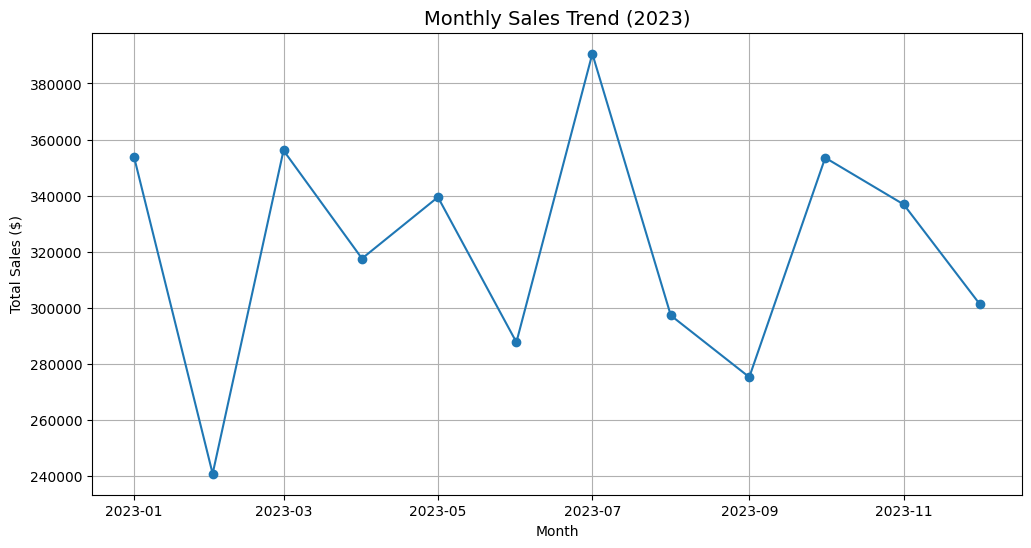

In [ ]:
import matplotlib.pyplot as plt

# Group by month and sum total sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['TotalSales'].sum()

# Convert Monthly Sales Index to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

plt.title("Monthly Sales Trend (2023)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

### ^^^ This shows the monthly sale trend by the total sales; We can see the peak revenue for each month.

# Now for our last step, we can look at customer behavior again & this time we will do the average customer spending value; Wether a customer buys one or a bundle of items.

In [25]:
# Average order value by grouping OrderID & TotalSales
avg_order_value = df.groupby('OrderID')['TotalSales'].sum().mean()
print("Average Order Value (AOV): $", round(avg_order_value, 2))

Average Order Value (AOV): $ 1106.0


### ^^^ This shows how much an average customer spends.

## Now we do the average quantity customers usually buy at once.

In [26]:
# Average quantity by grouping OrderID & Quantity
avg_quantity = df.groupby('OrderID')['Quantity'].sum().mean()
print("Average Quantity per Order:", round(avg_quantity, 2))

Average Quantity per Order: 2.49


# Lastly, we will do a visual chart to show the trend of how many customers buy one or multiple items.